<a href="https://colab.research.google.com/github/anhhao04/baitap01.github.io/blob/main/BT01_Nguy%E1%BB%85n_Anh_H%C3%A0o_20104006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d42ff265142fce0ac497edfa0480f776398dd1545aadb1a4c7461354a86a4ea8
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


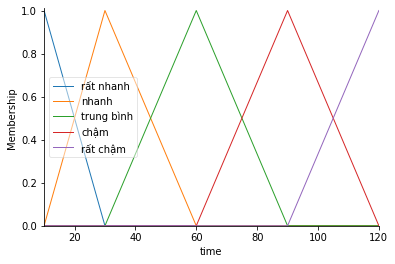

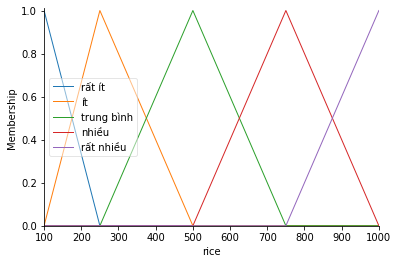

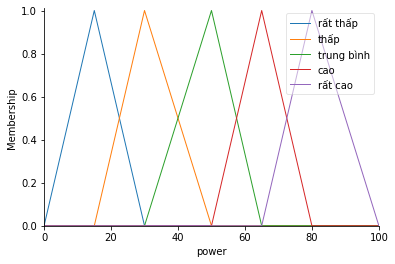

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,1),'time') 
rice = ctrl.Antecedent(np.arange(100,1001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power') 
time['rất nhanh'] = fuzz.trimf(time.universe,[10,10,30])
time['nhanh'] = fuzz.trimf(time.universe,[10,30,60])
time['trung bình'] = fuzz.trimf(time.universe,[30,60,90])
time['chậm'] = fuzz.trimf(time.universe,[60,90,120])
time['rất chậm'] = fuzz.trimf(time.universe,[90,120,120])
rice['rất ít'] = fuzz.trimf(rice.universe,[100,100,250])
rice['ít'] = fuzz.trimf(rice.universe,[100,250,500])
rice['trung bình'] = fuzz.trimf(rice.universe,[250,500,750])
rice['nhiều'] = fuzz.trimf(rice.universe,[500,750,1000])
rice['rất nhiều'] = fuzz.trimf(rice.universe,[750,1000,1000])
power['rất thấp'] = fuzz.trimf(power.universe,[0,15,30])
power['thấp'] = fuzz.trimf(power.universe,[15,30,50])
power['trung bình'] = fuzz.trimf(power.universe,[30,50,65])
power['cao'] = fuzz.trimf(power.universe,[50,65,80])
power['rất cao'] = fuzz.trimf(power.universe,[65,80,100])
time.view()
rice.view()            
power.view()

64.99999999999999


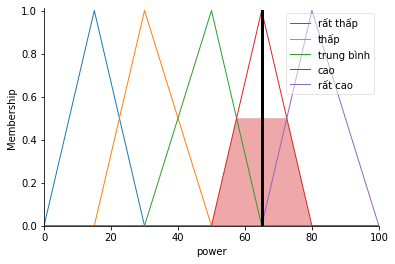

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rule1 = ctrl.Rule(time['rất nhanh'] & rice['rất ít'],power['trung bình'])
rule2 = ctrl.Rule(time['rất nhanh']&rice['ít'],power['cao'])
rule3 = ctrl.Rule(time['rất nhanh'] & rice['trung bình'],power['cao'])
rule4 = ctrl.Rule(time['rất nhanh'] & rice['nhiều'],power['rất cao'])
rule5 = ctrl.Rule(time['rất nhanh'] & rice['rất nhiều'],power['rất cao'])
rule6 = ctrl.Rule(time['nhanh'] & rice['rất ít'],power['thấp'])
rule7 = ctrl.Rule(time['nhanh'] & rice['ít'],power['trung bình'])
rule8 = ctrl.Rule(time['nhanh'] & rice['trung bình'],power['cao'])
rule9 = ctrl.Rule(time['nhanh'] & rice['nhiều'],power['cao'])
rule10 = ctrl.Rule(time['nhanh'] & rice['rất nhiều'],power['rất cao'])
rule11 = ctrl.Rule(time['trung bình'] & rice['rất ít'],power['thấp'])
rule12 = ctrl.Rule(time['trung bình'] & rice['ít'],power['thấp'])
rule13 = ctrl.Rule(time['trung bình'] & rice['trung bình'],power['trung bình'])
rule14 = ctrl.Rule(time['trung bình'] & rice['nhiều'],power['cao'])
rule15 = ctrl.Rule(time['trung bình'] & rice['rất nhiều'],power['cao'])
rule16 = ctrl.Rule(time['chậm'] & rice['rất ít'],power['rất thấp'])
rule17 = ctrl.Rule(time['chậm'] & rice['ít'],power['rất thấp'])
rule18 = ctrl.Rule(time['chậm'] & rice['trung bình'],power['trung bình'])
rule19 = ctrl.Rule(time['chậm'] & rice['nhiều'],power['trung bình'])
rule20 = ctrl.Rule(time['chậm'] & rice['rất nhiều'],power['trung bình'])
rule21 = ctrl.Rule(time['rất chậm'] & rice['rất ít'],power['rất thấp'])
rule22 = ctrl.Rule(time['rất chậm'] & rice['ít'],power['rất thấp'])
rule23= ctrl.Rule(time['rất chậm'] & rice['trung bình'],power['rất thấp'])
rule24 = ctrl.Rule(time['rất chậm'] & rice['nhiều'],power['thấp'])
rule25 = ctrl.Rule(time['rất chậm'] & rice['rất nhiều'],power['thấp'])
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time']= 20      
powering.input['rice']= 500
powering.compute()
print(powering.output['power'])
power.view(sim=powering)